# 机器学习实验五：层次聚类算法
- **姓名：刘伟**
- **学号：2013029**
- **专业：物联网工程**

### 生成用于聚类的数据集

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

def create_data(centers,num,std):
    '''
    生成用于聚类的数据集
    :param centers: 聚类的中心点组成的数组。如果中心点是二维的，则产生的每个样本都是二维的。
    :param num: 样本数
    :param std: 每个簇中样本的标准差
    :return: 用于聚类的数据集。是一个元组，第一个元素为样本集，第二个元素为样本集的真实簇分类标记
    '''
    X, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return  X,labels_true


def plot_data(*data):
    '''
    绘制用于聚类的数据集
    :param data: 可变参数。它是一个元组。元组元素依次为：第一个元素为样本集，第二个元素为样本集的真实簇分类标记，第三个元素为预测分类标记
    :return: None
    '''
    X,labels_true,labels_predict=data
    fig=plt.figure(figsize=(11,6))
    ax=fig.add_subplot(1,1,1)
    colors='rgbyckm' # 每个簇的样本标记不同的颜色
    markers='o^sP*DX'
    for i in range(len(labels_true)):
        predict=labels_predict[i]-1  # 让颜色对齐
        ax.scatter(X[i,0],X[i,1],label="cluster %d"%labels_true[i],
        color=colors[predict%len(colors)],marker=markers[labels_true[i]%len(markers)],alpha=0.5)

centers=[[1,1,1],[1,3,3],[3,6,5],[2,6,8]]# 用于产生聚类的中心点, 聚类中心的维度代表产生样本的维度
X,labels_true= create_data(centers,2000,0.5) # 产生用于聚类的数据集，聚类中心点的个数代表类别数
print("generate data finish!")

generate data finish!


### 散点图展示出原始聚类数据集

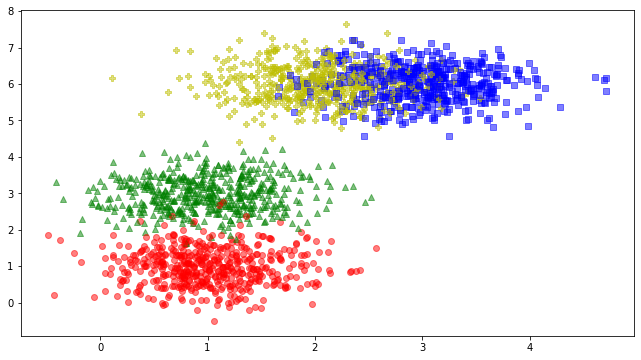

In [2]:
fig=plt.figure(figsize=(11,6)) 
ax=fig.add_subplot(1,1,1)
colors='rgbyckm' # 每个簇的样本标记不同的颜色
markers='o^sP*DX'
for i in range(len(labels_true)):
    ax.scatter(X[i,0],X[i,1],label="cluster %d"%labels_true[i],
    c=colors[labels_true[i]%len(colors)],marker=markers[labels_true[i]%len(markers)],alpha=0.5)

### 聚类模型class

In [3]:
class AgglomerativeClustering:
    def __init__(self):
        # 对每次的合并进行记录
        self.steps=[]

    def fit(self,datas,method):
        self.dataCnt = datas.shape[0]   # 2000
        # 预处理各点之间的距离
        allDist = np.zeros((self.dataCnt,self.dataCnt))
        for i in range(self.dataCnt):
            for j in range(i):
                allDist[i][j] = allDist[j][i] = np.sum((datas[i]-datas[j])**2)
        setList, clusterCount = [[i] for i in range(self.dataCnt)], self.dataCnt
        print("calculate distance finish!")

        # 聚类间距离矩阵
        clusterDist = np.zeros((self.dataCnt,self.dataCnt))+1e3
        for i in range(clusterCount):
            for j in range(i+1,clusterCount):
                clusterDist[i][j] = clusterDist[j][i] = allDist[i][j]
        print("calculate cluster distance finish!")

        while clusterCount != 1:
            # 最相似的两个聚类
            res = np.argmin(clusterDist)
            dest,src = int(res/clusterCount),res%clusterCount
            # steps进行一次记录
            self.steps.append((setList[dest][0],setList[src][0]))
            # 聚类间距离矩阵更新
            modify = method(clusterDist[[dest,src]])
            clusterDist[dest] = modify
            clusterDist[:,dest] = modify
            clusterDist = np.delete(clusterDist,src,axis=0)
            clusterDist = np.delete(clusterDist,src,axis=1)
            clusterDist[dest][dest] = 1e3
            # 聚类更新
            setList[dest] = setList[dest] + setList[src]
            del setList[src]
            clusterCount -= 1
            # if (self.dataCnt - clusterCount) % (self.dataCnt / 10) == 0:
            #     print(clusterCount, " clusters left.")

        print("cluster finish !")

    def label(self,k):
        root = list(range(self.dataCnt))
        def find_root(n):
            if root[root[n]] == root[n]:
                return root[n]
            root[n]=find_root(root[n])
            return root[n]
        for i in range(self.dataCnt-k): # 根据steps记录产生非连通图
            src,dest = self.steps[i]
            root[find_root(dest)] = find_root(src)
        cluster, clusterNum = [0 for i in range(self.dataCnt)], 0
        for i in range(self.dataCnt): # 将根节点标注为新的cluster
            if i == root[i]: # i是根
                clusterNum += 1
                cluster[i] = clusterNum
        for i in range(self.dataCnt): # 将非根节点标注为根节点的cluster
            if i != root[i]: # i不是根
                cluster[i] = cluster[find_root(i)]
        return cluster

## 基本要求
- 实现single-linkage层次聚类算法
- 实现complete-linkage层次聚类算法

In [4]:
def single_linkage(clusterDist):
    dis = np.min(clusterDist, axis=0)
    return dis

def complete_linkage(clusterDist):
    dis = np.max(clusterDist, axis=0)
    return dis

## 中级要求
- 实现average-linkage层次聚类算法
- 将上述三种算法的性能进行简要对比

In [5]:
def average_linkage(clusterDist):
    dis = np.mean(clusterDist, axis=0)
    return dis

### 展示分类结果数据分布图

calculate distance finish!
calculate cluster distance finish!
cluster finish !
calculate distance finish!
calculate cluster distance finish!
cluster finish !
calculate distance finish!
calculate cluster distance finish!
cluster finish !


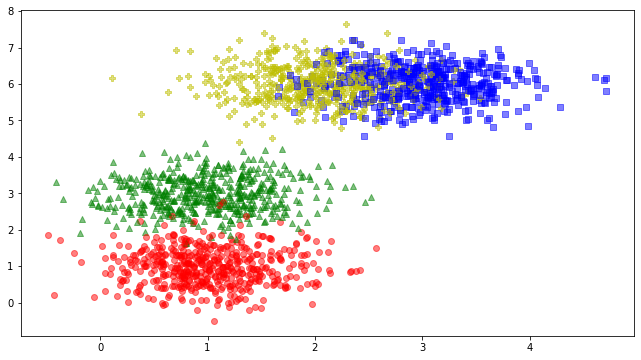

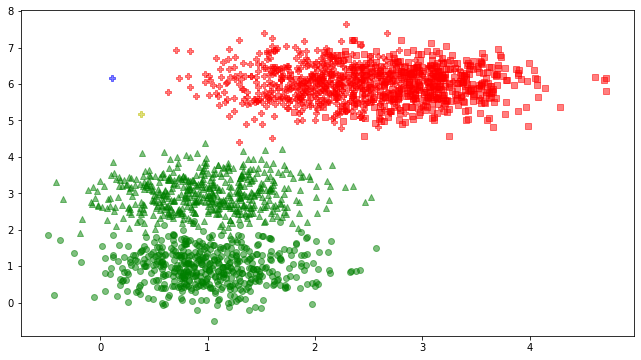

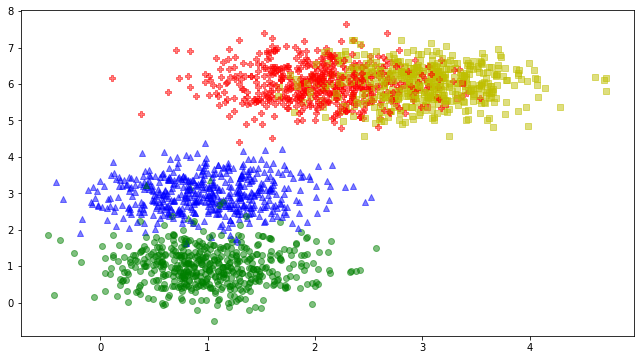

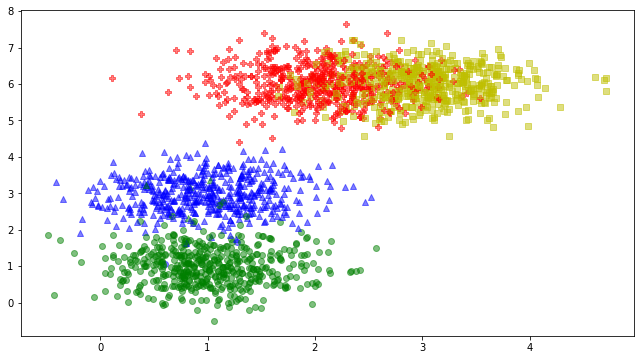

In [6]:
# 展示原数据label标签图
fig=plt.figure(figsize=(11,6)) 
ax=fig.add_subplot(1,1,1)
colors='rgbyckm' # 每个簇的样本标记不同的颜色
markers='o^sP*DX'
for i in range(len(labels_true)):
    ax.scatter(X[i,0],X[i,1],label="cluster %d"%labels_true[i],
    c=colors[labels_true[i]%len(colors)],marker=markers[labels_true[i]%len(markers)],alpha=0.5)
    
METHOD_APPLY = [single_linkage,complete_linkage,average_linkage]
Pred = []
for method in METHOD_APPLY:
    model = AgglomerativeClustering()
    model.fit(X, method)
    k = 4
    labels_predict = model.label(k)
    Pred.append(labels_predict)
    plot_data(X, labels_true, labels_predict)

### 计算三种分类的准确率

In [7]:
from sklearn import metrics
METHOD = ['single_linkage','complete_linkage','average_linkage']
for index,labels_pred in enumerate(Pred):
    score = metrics.adjusted_rand_score(labels_true, labels_pred)
    print(str(METHOD[index]),score)

single_linkage 0.4991262838267789
complete_linkage 0.9880369127429918
average_linkage 0.990702077178426


### 将上述三种算法的性能进行简要对比

在上述实验数据基础上进行三种聚类的结果图中，我们可以明显的看出，使用average-linkage算法的实验分类结果最优，其次是complete-linkage算法的实验分类结果。single-linkage算法的分类结果最差。当然上述实验的结果肯定与一开始生成的四类原始数据中心点之间的距离有关系。

综合各种数据分布情况以及三种分类算法自身的特性概括以下结论：

- SingleLinkage：又叫做 nearest-neighbor ，就是取两个类中距离最近的两个样本的距离作为这两个集合的距离，也就是说，最近两个样本之间的距离越小，这两个类之间的相似度就越大。容易造成一种叫做 Chaining 的效果，两个 cluster 明明从“大局”上离得比较远，但是由于其中个别的点距离比较近就被合并了，并且这样合并之后 Chaining 效应会进一步扩大，最后会得到比较松散的 cluster 。

- CompleteLinkage：这个则完全是 Single Linkage 的反面极端，取两个集合中距离最远的两个点的距离作为两个集合的距离。其效果也是刚好相反的，限制非常大，两个 cluster 即使已经很接近了，但是只要有不配合的点存在，就顽固到底，老死不相合并，也是不太好的办法。这两种相似度的定义方法的共同问题就是指考虑了某个有特点的数据，而没有考虑类内数据的整体特点。

- Average-linkage：这种方法就是把两个集合中的点两两的距离全部放在一起求一个平均值，相对也能得到合适一点的结果


## 高级要求
- 通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析

### 更换数据：样本数据由五类数据构成、总数为3000、方差均不同

generate data finish!


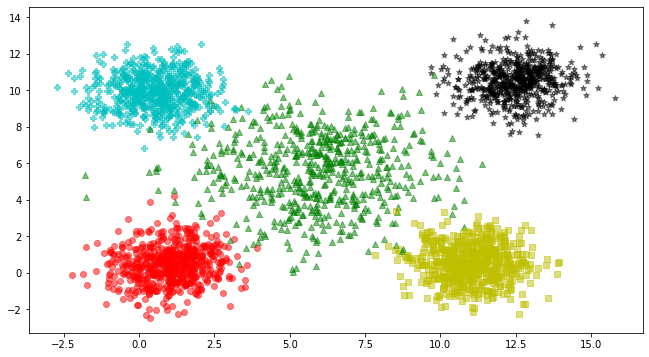

In [8]:
new_centers=[[1,0.5],[6,5.5],[11,0.5],[0.5,10],[12.5,10.5]]# 用于产生聚类的中心点, 聚类中心的维度代表产生样本的维度
X,labels_true= create_data(new_centers,3000,[1.0,2.0,1.0,1.0,1.0]) # 产生用于聚类的数据集，聚类中心点的个数代表类别数
print("generate data finish!")

# 展示原数据label标签图
fig=plt.figure(figsize=(11,6)) 
ax=fig.add_subplot(1,1,1)
colors='rgyckm' # 每个簇的样本标记不同的颜色
markers='o^sP*DX'
for i in range(len(labels_true)):
    ax.scatter(X[i,0],X[i,1],label="cluster %d"%labels_true[i],
    c=colors[labels_true[i]%len(colors)],marker=markers[labels_true[i]%len(markers)],alpha=0.5)

calculate distance finish!
calculate cluster distance finish!
cluster finish !
calculate distance finish!
calculate cluster distance finish!
cluster finish !
calculate distance finish!
calculate cluster distance finish!
cluster finish !
single_linkage 8.701099578008252e-06
complete_linkage 0.898112572758558
average_linkage 0.7329379403467559


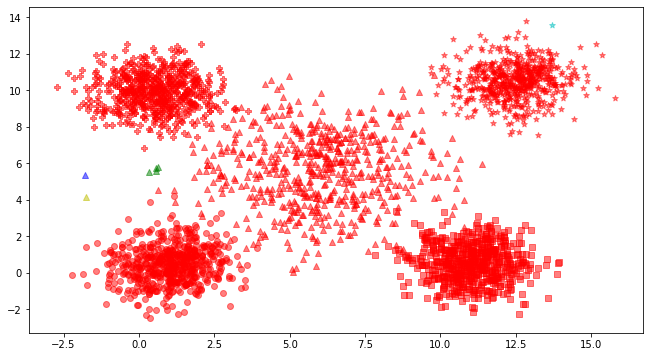

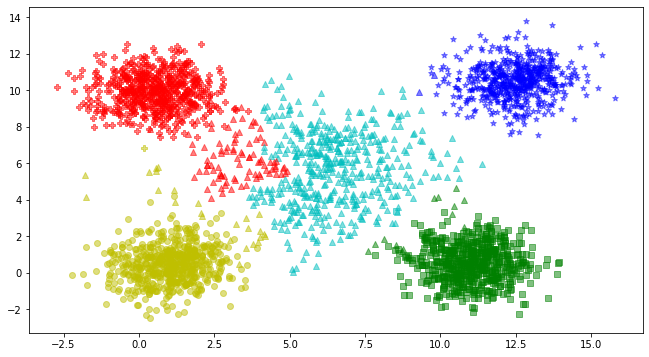

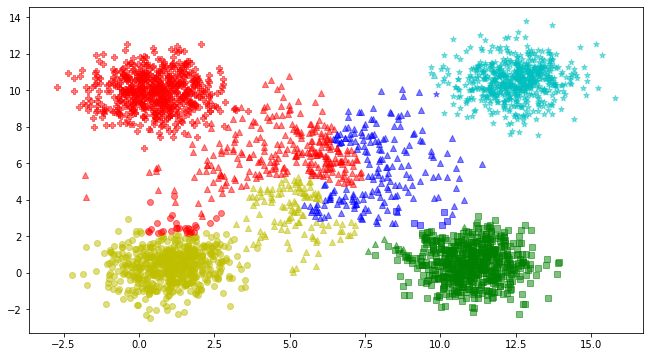

In [9]:
METHOD_APPLY = [single_linkage,complete_linkage,average_linkage]
Pred = []
for method in METHOD_APPLY:
    model = AgglomerativeClustering()
    model.fit(X, method)
    k = 5
    labels_predict = model.label(k)
    Pred.append(labels_predict)
    plot_data(X, labels_true, labels_predict)

for index,labels_pred in enumerate(Pred):
    score = metrics.adjusted_rand_score(labels_true, labels_pred)
    print(str(METHOD[index]),score)

从分类结果图中，可以看出：
- single_linkage分类方法取样本中距离最近的进行分类误差较大，唯有在同类间距小，不同类间距大的情况下才能够很好的进行分类预测
- complete_linkage分类方法适合样本类方差较大，能够容纳下更大的数据为同一类，这在同类之间间距较大的情况下具有很好的预测能力
- average_linkage则是处在上俩种方法的中间，对普遍情况更加适应，具有较好的泛化能力